# Malaria Detection SVM

# Table of Contents:
**1** - Introduction

**2** - Import Libraries

**3** - Load and Overview Data

**4** - Data representation

**5** - Support Vector Machine (SVM)  

**6** - Model Testing And Accuracy

**7** - Learning Curve

**8** - Confusion Matrix

**9** - ROC Curve

## **1** - Introduction
Support Vector Machines (SVMs in short) are machine learning algorithms that are used for classification and regression purposes. SVMs are one of the powerful machine learning algorithms for classification, regression and outlier detection purposes. An SVM classifier builds a model that assigns new data points to one of the given categories. Thus, it can be viewed as a non-probabilistic binary linear classifier.

The original SVM algorithm was developed by Vladimir N Vapnik and Alexey Ya. Chervonenkis in 1963. At that time, the algorithm was in early stages. The only possibility is to draw hyperplanes for linear classifier. In 1992, Bernhard E. Boser, Isabelle M Guyon and Vladimir N Vapnik suggested a way to create non-linear classifiers by applying the kernel trick to maximum-margin hyperplanes. The current standard was proposed by Corinna Cortes and Vapnik in 1993 and published in 1995.

SVMs can be used for linear classification purposes. In addition to performing linear classification, SVMs can efficiently perform a non-linear classification using the kernel trick. It enable us to implicitly map the inputs into high dimensional feature spaces.

## 2 - IMPORT LIBRARIES

In [1]:
import matplotlib
import matplotlib.pyplot as plt
from skimage import transform, color 
import numpy as np
import os
from os import listdir
import cv2
import sklearn
from PIL import Image 
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report,accuracy_score, plot_confusion_matrix, roc_curve
from sklearn.model_selection import learning_curve

## 3 -Load and Overview Data 
All data is read and resized per image to 40px,40px for lower processing power. x and y datas are created. Images will be in x data and y data for this data parasitized or not. If y data value equal to 1 this data it means parasitized.

In [2]:
x = list() #create x data
y = list() # create y data
for i in os.listdir("C:/Users/LEGION/OneDrive - Faculty of Computers and Information/Desktop/Malaria/cell_images/cell_images/Parasitized"): #read all parasitized data 
    if ".png" in i: #this if block for only read .png files
        path = "C:/Users/LEGION/OneDrive - Faculty of Computers and Information/Desktop/Malaria/cell_images/cell_images/Parasitized/"+i # create path
        img = plt.imread(path) # and read created path
        img = cv2.resize(img,(40,40)) # resize image for lower processing power
        x.append(img) # append image to x data
        y.append(1) 
for i in os.listdir("C:/Users/LEGION/OneDrive - Faculty of Computers and Information/Desktop/Malaria/cell_images/cell_images/Uninfected"):
    if ".png" in i:
        path = "C:/Users/LEGION/OneDrive - Faculty of Computers and Information/Desktop/Malaria/cell_images/cell_images/Uninfected/"+i
        img = plt.imread(path)
        img = cv2.resize(img,(40,40))
        x.append(img)
        y.append(0)
x = np.array(x)

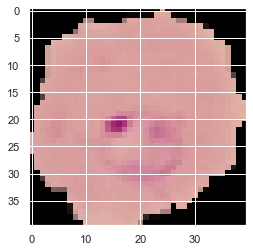

In [3]:
plt.imshow(x[0])

Images parasitized

In [4]:
sample_images_positive = []
i=0
for filename in listdir('C:/Users/LEGION/OneDrive - Faculty of Computers and Information/Desktop/Malaria/cell_images/cell_images/Parasitized/'):
    if i < 10:
        img = plt.imread('C:/Users/LEGION/OneDrive - Faculty of Computers and Information/Desktop/Malaria/cell_images/cell_images/Parasitized/' + filename)
        sample_images_positive.append(img)
        i+=1

Images uninfected

In [5]:
sample_images_negative = []
i=0
for filename in listdir('C:/Users/LEGION/OneDrive - Faculty of Computers and Information/Desktop/Malaria/cell_images/cell_images/Uninfected/'):
    if i < 10:
        img = plt.imread('C:/Users/LEGION/OneDrive - Faculty of Computers and Information/Desktop/Malaria/cell_images/cell_images/Uninfected/' + filename)
        sample_images_negative.append(img)
        i+=1

Show random 4 data and their status

<Figure size 432x288 with 0 Axes>

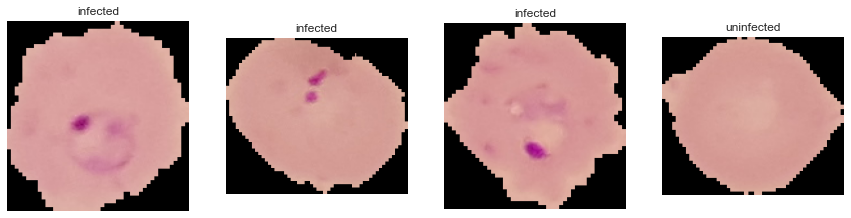

In [6]:
plt.figure()
fig, axes = plt.subplots(1, 4, figsize=(15,15))
ax1 = axes[0]
ax1.imshow(sample_images_positive[0], cmap='Greys_r')
ax1.set_title('infected')
ax1.axis('off')
ax2 = axes[1]
ax2.imshow(sample_images_positive[5], cmap='Greys_r')
ax2.set_title('infected')
ax2.axis('off')
ax3 = axes[2]
ax3.imshow(sample_images_positive[9], cmap='Greys_r')
ax3.set_title('infected')
ax3.axis('off')
ax4 = axes[3]
ax4.imshow(sample_images_negative[0], cmap='Greys_r')
ax4.set_title('uninfected')
ax4.axis('off');

## 4- Data representation 
Grayscale

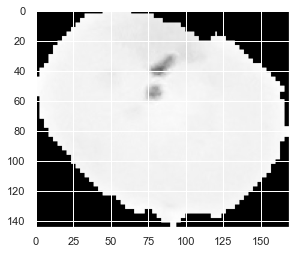

In [7]:
image_grayscale = color.rgb2gray(sample_images_positive[5])
plt.imshow(image_grayscale, cmap='Greys_r')

padding function to keep the resolution of the pictures

In [8]:
def padding(image, size):
    desired_size = size
    old_size = image.size
    ratio = float(desired_size)/max(old_size)
    new_size = tuple([int(x*ratio) for x in old_size])
    im = image.resize(new_size, Image.ANTIALIAS)
    new_im = Image.new('RGB',(desired_size, desired_size))
    new_im.paste(image, ((desired_size-new_size[0])//2,
                    (desired_size-new_size[1])//2))
    return new_im

function for brightening the image background

In [9]:
def brighten(image):
    max_ = np.max(image)
    image[image==0.0] = max_
    return image

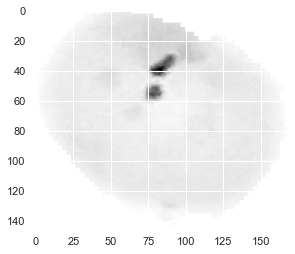

In [10]:
img = sample_images_positive[5]
img = np.array(img)
img = color.rgb2gray(img)
img = brighten(img)
plt.imshow(img, cmap='Greys_r');

Applying functions

In [11]:
X_positive_bright = []
for filename in listdir('C:/Users/LEGION/OneDrive - Faculty of Computers and Information/Desktop/Malaria/cell_images/cell_images/Parasitized/'):
    if 'Thumbs.db' not in filename:
        img = Image.open('C:/Users/LEGION/OneDrive - Faculty of Computers and Information/Desktop/Malaria/cell_images/cell_images/Parasitized/' + filename)
        img = padding(img, 220)
        img = np.array(img)
        img = color.rgb2gray(img)
        img = brighten(img.reshape(220*220))
        img = transform.resize(img.reshape(220,220), (100,100))
        X_positive_bright.append(img)
X_positive_bright = np.array(X_positive_bright)

In [12]:
X_negative_bright = []
for filename in listdir('C:/Users/LEGION/OneDrive - Faculty of Computers and Information/Desktop/Malaria/cell_images/cell_images/Uninfected/'):
    if 'Thumbs.db' not in filename:
        img = Image.open('C:/Users/LEGION/OneDrive - Faculty of Computers and Information/Desktop/Malaria/cell_images/cell_images/Uninfected/' + filename)
        img = padding(img, 220)
        img = np.array(img)
        img = color.rgb2gray(img)
        img = brighten(img.reshape(220*220))
        img = transform.resize(img.reshape(220,220), (100,100))
        X_negative_bright.append(img)
X_negative_bright = np.array(X_negative_bright)

Flatten

In [13]:
X_positive_bright = X_positive_bright.reshape(13779, 100*100)
X_negative_bright = X_negative_bright.reshape(13779, 100*100)

Normalization

In [14]:
X_positive_bright.min(), X_positive_bright.max(), X_negative_bright.min(), X_negative_bright.max()

(0.0806995401124341,
 0.9148203921568625,
 0.05867339546138877,
 0.9469815686274505)

#### Feature Engineering: Principal Component Analysis
For feature engineering principal component analysis should be adopted due to the following reasons:

**1** the number of features can be reduced by this measure

**2** components are identified that explain a high amount of variance. Through this the training of the model is simplified

**3** for the support vector machine as the model class of choice the principal component analysis is indicated in any case

In [15]:
X_full = np.row_stack((X_positive_bright, X_negative_bright))
pca_full_variance = PCA(n_components = 0.95) 
pca_full_variance.fit(X_full) 

PCA(n_components=0.95)

96 components already explain 95% of variance

In [16]:
X_reduced = pca_full_variance.transform(X_full)
X_reduced.shape

(27558, 96)

create target variable

In [17]:
y_positive = np.ones(X_positive_bright.shape[0])
y_negative = np.zeros(X_negative_bright.shape[0])
y = np.hstack((y_positive, y_negative))

## 5- Support Vector Machine (SVM)

### Split data into separate training, validation and test set 

In [18]:
# split X and y into training , validation and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, train_size=0.85)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, train_size=0.85)

# check the shape of X_train and X_test
print(X_train.shape)
print(X_test.shape)
print(X_valid.shape)


(19910, 96)
(4134, 96)
(3514, 96)


In [19]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_valid = sc.fit_transform(X_valid)
X_test = sc.transform(X_test)

### Fit SVM Model 

In [19]:
modelnm = SVC(kernel='linear',C=1) 
modelnm.fit(X_train, y_train) 
  
# model prediction results on test data 

predictions = modelnm.predict(X_valid) 
print(classification_report(y_valid, predictions))


              precision    recall  f1-score   support

         0.0       0.64      0.74      0.69      1760
         1.0       0.69      0.58      0.63      1754

    accuracy                           0.66      3514
   macro avg       0.66      0.66      0.66      3514
weighted avg       0.66      0.66      0.66      3514



In [19]:
model = SVC(kernel='linear',C=100) 
model.fit(X_train, y_train) 
  
# model prediction results on test data 

predictions = model.predict(X_valid) 
print(classification_report(y_valid, predictions)) 

              precision    recall  f1-score   support

         0.0       0.65      0.76      0.70      1746
         1.0       0.72      0.60      0.66      1768

    accuracy                           0.68      3514
   macro avg       0.68      0.68      0.68      3514
weighted avg       0.69      0.68      0.68      3514



In [21]:
model7 = SVC(kernel='rbf',C=1) 
model7.fit(X_train, y_train) 
  
# model prediction results on test data 

prediction = model7.predict(X_valid) 
print(classification_report(y_valid, prediction))

              precision    recall  f1-score   support

         0.0       0.76      0.85      0.81      1768
         1.0       0.83      0.73      0.78      1746

    accuracy                           0.79      3514
   macro avg       0.80      0.79      0.79      3514
weighted avg       0.80      0.79      0.79      3514



In [25]:
model8 = SVC(kernel='rbf',C=1000) 
model8.fit(X_train, y_train) 
  
# model prediction results on test data 

predict = model8.predict(X_valid) 
print(classification_report(y_valid, predict))

              precision    recall  f1-score   support

         0.0       0.86      0.88      0.87      1768
         1.0       0.88      0.86      0.87      1746

    accuracy                           0.87      3514
   macro avg       0.87      0.87      0.87      3514
weighted avg       0.87      0.87      0.87      3514



In [45]:
modelval = SVC(kernel='rbf',C=100) 
modelval.fit(X_train, y_train) 
  
# model prediction results on test data 

predicval = modelval.predict(X_valid) 
print(classification_report(y_valid, predicval))

              precision    recall  f1-score   support

         0.0       0.92      0.90      0.91      1782
         1.0       0.90      0.92      0.91      1732

    accuracy                           0.91      3514
   macro avg       0.91      0.91      0.91      3514
weighted avg       0.91      0.91      0.91      3514



## 6- Model Testing And Accuracy

In [21]:
modelFFFF = SVC(kernel='rbf',C=100) 
modelFFFF.fit(X_train, y_train) 
  
# model prediction results on test data 

predicFFFF = modelFFFF.predict(X_test) 
print(classification_report(y_test, predicFFFF))

              precision    recall  f1-score   support

         0.0       0.91      0.91      0.91      2102
         1.0       0.91      0.91      0.91      2032

    accuracy                           0.91      4134
   macro avg       0.91      0.91      0.91      4134
weighted avg       0.91      0.91      0.91      4134



In [44]:
accuracy_score(y_test, predicFFFF)

0.9107402031930334

## 7- Learning Curve

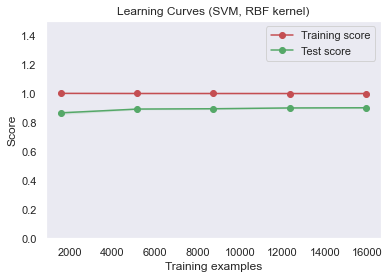

In [32]:
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Test score")

    plt.legend(loc="best")
    return plt




title = "Learning Curves (SVM, RBF kernel)"
cv = None
estimator = modelFFFF
plot_learning_curve(estimator, title, X_train, y_train, (0, 1.5), cv=cv, n_jobs=1)

plt.show()

In [1]:
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Test score")

    plt.legend(loc="best")
    return plt




title = "Learning Curves (SVM, RBF kernel)"
cv = None
estimator = modelFFFF
plot_learning_curve(estimator, title, X_train, y_train, (0, 1.5), cv=cv, n_jobs=1)

plt.show()

NameError: name 'np' is not defined

## 8- Confusion Matrix

[[1913  189]
 [ 180 1852]]


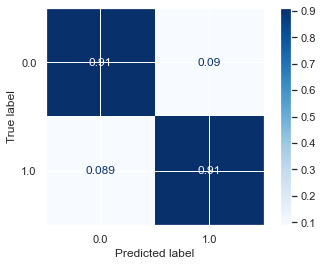

In [26]:
y_pred = modelFFFF.predict(X_test)
y_pred = (y_pred > 0.5)
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
plot_confusion_matrix(modelFFFF, X_test, y_test,
                     cmap=plt.cm.Blues,
                                 normalize='true')
plt.show();

## 9- ROC Curve

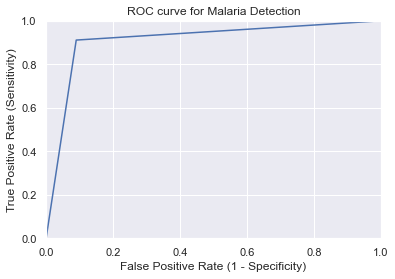

In [27]:
from sklearn.metrics import roc_curve

y_pred = modelFFFF.predict(X_test).ravel()
fprValue, tprValue, thresholdsValue = roc_curve(y_test,y_pred)
plt.plot(fprValue, tprValue)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Malaria Detection')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)